# 1. Predicting Breast Cancer Using Machine Learning

![header-main.jpg](images/predicting-breast-cancer-using-machine-learning.png)


---


# 1. Predicting Breast Cancer Using Machine Learning

![header-main.jpg](images/predicting-breast-cancer-using-machine-learning.png)


## 1.1 Background Statement

Imagine harnessing the power of machine learning to predict one of the most prevalent and life-threatening diseases: breast cancer. As data science enthusiasts, we often seek new challenges to expand our skills and dive into unexplored territories. This journey not only enhances our technical prowess but also broadens our understanding of diverse fields. This article invites you to venture beyond the realms of `digital marketing` and `media investment` into the captivating world of `healthcare`. Did you know that cancer is the second leading cause of death globally, accounting for approximately 9.6 million deaths in 2018, according to the [WHO](https://www.who.int/news-room/fact-sheets/detail/cancer#:~:text=Cancer%20is%20the%20second%20leading,-%20and%20middle-income%20countries.). This staggering statistic underscores the urgent need for innovative solutions in early detection and treatment.


## 1.2 Steps in Order

Join me as we explore how machine learning can be a game-changer in predicting breast cancer symptoms. We'll utilize a comprehensive dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29), generously provided by academicians, to build our predictive model. To bring this vision to life, we'll employ powerful Python libraries like [Pandas](https://pandas.pydata.org/), [Seaborn](https://seaborn.pydata.org/), and [Scikit-learn](https://scikit-learn.org/).

These tools will help us explore, clean, and visualize data, ultimately leading to a robust machine learning model. Ready to embark on this exciting adventure? Let's break it down into manageable steps:

1. **Loading Libraries**
2. **Data Exploration**
3. **Data Visualization**
4. **One Hot Encoding**
5. **Feature Generation**
6. **Data Splitting**
7. **Machine Learning Modeling**
8. **Data Prediction**

Dive in and discover how you can leverage machine learning to make a meaningful impact in the fight against breast cancer.


## 1.3 Loading Python Libraries

Much like any other data exploratory process in Pandas or Python, the initial phase involves loading the essential libraries into our working Jupyter Notebook environment. These libraries are the backbone of our data analysis and machine learning endeavors, providing us with the tools needed to manipulate, visualize, and model our data. Whether you're using `Jupyter Notebook`, `Google Colab`, or `Kaggle`, the process remains largely the same. These platforms offer robust environments that support Python and its libraries, making them ideal for data science projects.

For this tutorial, I'll stick to my faithful Jupyter Notebook environment, known for its versatility and user-friendly interface. Jupyter Notebook allows for an interactive data analysis experience, where code, visualizations, and explanatory text can coexist seamlessly. This setup will enable us to document our process comprehensively and adjust our code on the fly as we delve into the breast cancer dataset. While you're free to use any Integrated Development Environment (IDE) you prefer, Jupyter Notebook's integration with libraries like `Pandas`, `Seaborn`, and `Scikit-learn` makes it an excellent choice for this step-by-step guide.


In [192]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library

## 1.4 Load Dataset

Start by creating a directory on your computer. Although I'm using a MacOS environment, the instructions provided here are applicable across different platforms. For the purpose of this walkthrough, let's name the directory `Project`. This will serve as our main working directory. Navigate into the `Project` folder, as this will be our base for organizing and executing the steps outlined in this tutorial. The next step is to download the breast cancer dataset from the [UCI](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) site, which we'll use for our machine learning model.

Within the `Project` directory, create a new folder named `data` and copy the downloaded CSV file into this `data` directory. This organization ensures that all relevant files are neatly stored and easily accessible throughout the tutorial. By structuring our project this way, we facilitate a smooth workflow and maintain order as we progress. Now that everything is set up, we can load the dataset into our Jupyter Notebook. This step allows us to examine, manipulate, and observe the data, laying the groundwork for our machine learning exploration.


In [193]:
df = pd.read_csv('data/breast_cancer_data.csv')

## 1.5 Dataset Size

Once we have completed the initial setup, we can proceed to analyze our dataset further. A common starting point in any data analysis project is to understand the size of the dataset. You might be wondering, just how large is our dataset? This question is easily answered using the `.shape` method in Pandas.

By applying the `.shape` method to our dataset, we can quickly obtain the number of rows and columns. This method returns a tuple representing the dimensions of the dataset, giving us an immediate sense of its scale. Understanding the size of our dataset is crucial as it informs us about the volume of data we will be working with and helps in planning subsequent data processing and analysis steps.


In [194]:
df.shape

(699, 12)

### Rows & Columns

We can see we have the following information at hand:

- rows `699`
- columns `12`


## 1.6 Data Types

It's always a good idea to get cozy with our dataset, not just by looking at its size, but by understanding what it's really made of. Think of it like getting to know a new friend—you wouldn't just ask them how tall they are, right? You'd want to know their quirks, their traits, what makes them tick. The same goes for our data. Knowing the types of data in each column helps us groove through the feature generation phase with ease.

So, let's kick back and take a deeper dive. By checking out the data types of each column, we get the full picture: the numbers, the categories, the text. This insight is like the smooth rhythm of a jazz tune, guiding us to apply the right transformations and manipulations. When we're in sync with our data, everything just flows better, leading to more accurate and reliable models. To get this vibe going, we'll use the `.dtypes` attribute in Pandas. It’s our backstage pass to the inner workings of the dataset, giving us a clear overview of the structure and content. Let's get jazzy with our data and see what it’s composed of!


In [195]:
# We need to observe the data types of each columns
df.dtypes

patient_id                 int64
clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei               object
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
class                     object
doctor_name               object
dtype: object

### 1.6.1 The Data Legend

Let's lay down the smooth beats of our dataset. Here's the lowdown on the columns we have, as described by the source:

- `Patient ID`: id number
- `Clump Thickness`: 1–10
- `Uniformity of Cell Size`: 1–10
- `Uniformity of Cell Shape`: 1–10
- `Marginal Adhesion`: 1–10
- `Single Epithelial Cell Size`: 1–10
- `Bare Nuclei`: 1–10
- `Bland Chromatin`: 1–10
- `Normal Nucleoli`: 1–10
- `Mitoses`: 1–10
- `Class`: malignant or benign
- `Doctor name`: 4 different doctors

So, what’s the vibe here? The `Patient ID` is our unique identifier, ensuring each record stands out. The `Class` column is the headline act, telling us whether the tumor is `malignant` (cancerous) or `benign` (not cancerous). The rest of the columns? They're numeric medical descriptions of the tumor, except for `Doctor name`, which adds a categorical twist.

> Keep this in mind—if our goal is to predict whether a tumor is cancerous based on the other features, we’ll need to perform some one-hot encoding on the categorical data and clean up the numerical data. Just like tuning an instrument before a jam session, prepping our data ensures everything flows smoothly in our analysis.


### 1.6.2 First & Last Rows

Now that we've got the lay of the land, let's dive in and see what the top five records in our dataset look like. This peek at the first few rows will give us a quick feel for the data and help us spot any obvious issues or patterns right off the bat.

To do this, we'll use the `.head()` method in Pandas, which will show us the first five rows. It's like getting a sneak preview of the opening act before the main event. This simple step is crucial for ensuring we're on the right track and that our data is ready to roll.


In [196]:
df.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong


Additionally, checking the last few records with the `.tail()` method will give us a complete sense of the dataset's structure. This combination of the first and last rows provides a balanced overview, ensuring no surprises lurk at the end. Let's groove through the data and see what stories the top and bottom rows tell us!


In [197]:
df.tail()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee
698,897471,4.0,8.0,8,5,4,5,10.0,4.0,1,malignant,Dr. Wong


<hr />


# 2. Descriptive Statistics


In Descriptive statistics, we are describing our data with the help of various representative methods using `charts`, `graphs`, `tables`, `excel files`, etc. In descriptive statistics, we describe our data in some manner and present it in a meaningful way so that it can be easily understood. Most of the time it is performed on small data sets and this analysis helps us a lot to predict some future trends based on the current findings. Some measures that are used to describe a data set are measures of central tendency and measures of variability or dispersion.


## 2.1 Numerical Analysis


Let's jazz up our dataset with some sweet statistical insights! With the `.describe()` method, we're about to dive deep into the numerical nitty-gritty. This little trick gives us the lowdown on key stats like `count`, `mean`, and `standard deviation`, shedding light on the distribution and central tendencies of our numeric data.

So, why does this matter? Well, getting cozy with these numbers gives us a clearer picture of what we're working with. It's like fine-tuning our instruments before a performance—it ensures our analysis hits all the right notes. With these stats in hand, we can groove through our dataset with confidence, uncovering hidden patterns and trends along the way. Let's crank up the volume and see what the numbers have to say! 🎶


In [198]:
df.describe()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses
count,6.990000e+02,698.000000,698.000000,699.000000,699.000000,699.000000,695.000000,698.000000,699.000000
mean,1.071704e+06,4.416905,3.137536,3.207439,2.793991,3.216023,3.447482,2.868195,1.589413
std,6.170957e+05,2.817673,3.052575,2.971913,2.843163,2.214300,2.441191,3.055647,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,3.500000,4.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


## 2.2 Categorical Analysis


Just like tuning into a different frequency, let's shift our focus to the categorical side of the spectrum. With the `.describe(include=['O'])` method, we're about to unravel the mysteries of our categorical data. While the output might be a bit more concise compared to its numerical counterpart, it still packs a punch.

By honing in on the categorical variables—those with a data type of `object`—we gain valuable insights into their distribution and uniqueness. It's like flipping through the pages of a well-worn record collection, each category offering its own distinct vibe.

So, why bother? Well, understanding the landscape of our categorical data sets the stage for deeper analysis. Just like a DJ crafting the perfect mix, these insights help us blend and remix our data with precision. With the `.describe(include=['O'])` method in hand, we're ready to spin some categorical magic and uncover the stories hidden within our dataset. Let's dive in and see what melodies await! 🎵


In [199]:
df.describe(include=['O'])

,bare_nuclei,class,doctor_name
count,697,699,699
unique,11,2,4
top,1,benign,Dr. Doe
freq,401,458,185


---


# 3. Data Reshaping


Time to remix our data and give it a fresh new vibe! With the code snippet you've got in hand, we're about to shake things up and reshape our dataset like never before. By grooving to the beat of `df.groupby(by=['doctor_name', 'class']).count()`, we're taking our data on a whole new journey.

Picture this: we're gathering our data around the DJ booth, grouping it by the soothing sounds of `doctor_name` and the electrifying beats of `class`. Then, we crank up the volume with the aggregation function, counting up the hits in each group. It's like taking our dataset to a cool underground club, where every combination of doctor and class brings its own unique vibe.

Why does this matter? Well, reshaping our data in this way allows us to uncover fresh insights and patterns that might have been hidden before. It's like remixing a classic track—same ingredients, but with a whole new flavor. So, grab your data and let's hit the dance floor, because we're about to reshape it into something truly groovy! 🎧💃


## 3.1 Data Reshaping by `doctor_name`


In [200]:
# This aggreates the data by its column names, then we pass the aggregation function (size = count)
df.groupby(by =['doctor_name', 'class']).count()

patient_id  clump_thickness  cell_size_uniformity  \
doctor_name class                                                          
Dr. Doe     benign            127              127                   126   
            malignant          58               58                    58   
Dr. Lee     benign            121              121                   121   
            malignant          60               60                    60   
Dr. Smith   benign            102              102                   102   
            malignant          74               73                    74   
Dr. Wong    benign            108              108                   108   
            malignant          49               49                    49   

                       cell_shape_uniformity  marginal_adhesion  \
doctor_name class                                                 
Dr. Doe     benign                       127                127   
            malignant                     58                 58   
Dr. Lee     benign                       121                121   
            malignant                     60                 60   
Dr. Smith   benign                       102                102   
            malignant                     74                 74   
Dr. Wong    benign                       108                108   
            malignant                     49                 49   

                       single_ep_cell_size  bare_nuclei  bland_chromatin  \
doctor_name class                                                          
Dr. Doe     benign                     127          126              126   
            malignant                   58           58               57   
Dr. Lee     benign                     121          121              119   
            malignant                   60           60               60   
Dr. Smith   benign                     102          102              102   
            malignant                   74           73               74   
Dr. Wong    benign                     108          108              108   
            malignant                   49           49               49   

                       normal_nucleoli  mitoses  
doctor_name class                                
Dr. Doe     benign                 127      127  
            malignant               58       58  
Dr. Lee     benign                 121      121  
            malignant               60       60  
Dr. Smith   benign                 102      102  
            malignant               74       74  
Dr. Wong    benign                 107      108  
            malignant               49       49

## 3.2 Data Reshaping by `class`


In [201]:
df.groupby(by =['class', 'doctor_name']).count()

patient_id  clump_thickness  cell_size_uniformity  \
class     doctor_name                                                      
benign    Dr. Doe             127              127                   126   
          Dr. Lee             121              121                   121   
          Dr. Smith           102              102                   102   
          Dr. Wong            108              108                   108   
malignant Dr. Doe              58               58                    58   
          Dr. Lee              60               60                    60   
          Dr. Smith            74               73                    74   
          Dr. Wong             49               49                    49   

                       cell_shape_uniformity  marginal_adhesion  \
class     doctor_name                                             
benign    Dr. Doe                        127                127   
          Dr. Lee                        121                121   
          Dr. Smith                      102                102   
          Dr. Wong                       108                108   
malignant Dr. Doe                         58                 58   
          Dr. Lee                         60                 60   
          Dr. Smith                       74                 74   
          Dr. Wong                        49                 49   

                       single_ep_cell_size  bare_nuclei  bland_chromatin  \
class     doctor_name                                                      
benign    Dr. Doe                      127          126              126   
          Dr. Lee                      121          121              119   
          Dr. Smith                    102          102              102   
          Dr. Wong                     108          108              108   
malignant Dr. Doe                       58           58               57   
          Dr. Lee                       60           60               60   
          Dr. Smith                     74           73               74   
          Dr. Wong                      49           49               49   

                       normal_nucleoli  mitoses  
class     doctor_name                            
benign    Dr. Doe                  127      127  
          Dr. Lee                  121      121  
          Dr. Smith                102      102  
          Dr. Wong                 107      108  
malignant Dr. Doe                   58       58  
          Dr. Lee                   60       60  
          Dr. Smith                 74       74  
          Dr. Wong                  49       49

## 3.3 Data Reshaping by `bare_nuclei`


In [202]:
df.groupby(by =['bare_nuclei', 'class']).count()

patient_id  clump_thickness  cell_size_uniformity  \
bare_nuclei class                                                          
1           benign            386              386                   386   
            malignant          15               15                    15   
10          benign              3                3                     2   
            malignant         128              128                   128   
2           benign             21               21                    21   
            malignant           9                9                     9   
3           benign             14               14                    14   
            malignant          14               13                    14   
4           benign              6                6                     6   
            malignant          13               13                    13   
5           benign             10               10                    10   
            malignant          20               20                    20   
6           malignant           4                4                     4   
7           benign              1                1                     1   
            malignant           7                7                     7   
8           benign              2                2                     2   
            malignant          19               19                    19   
9           malignant           9                9                     9   
?           benign             14               14                    14   
            malignant           2                2                     2   

                       cell_shape_uniformity  marginal_adhesion  \
bare_nuclei class                                                 
1           benign                       386                386   
            malignant                     15                 15   
10          benign                         3                  3   
            malignant                    128                128   
2           benign                        21                 21   
            malignant                      9                  9   
3           benign                        14                 14   
            malignant                     14                 14   
4           benign                         6                  6   
            malignant                     13                 13   
5           benign                        10                 10   
            malignant                     20                 20   
6           malignant                      4                  4   
7           benign                         1                  1   
            malignant                      7                  7   
8           benign                         2                  2   
            malignant                     19                 19   
9           malignant                      9                  9   
?           benign                        14                 14   
            malignant                      2                  2   

                       single_ep_cell_size  bland_chromatin  normal_nucleoli  \
bare_nuclei class                                                              
1           benign                     386              383              385   
            malignant                   15               15               15   
10          benign                       3                3                3   
            malignant                  128              128              128   
2           benign                      21               21               21   
            malignant                    9                9                9   
3           benign                      14               14               14   
            malignant                   14               14               14   
4           benign                       6                6                

<hr >


# 4. Data Cleaning


Alright, time to chill and tidy up our dataset! Now that we've wrapped up the early analysis phase, it's onto the next groove: cleaning up our data. Picture this: your data rolls in with all sorts of shapes and sizes, like records in a crate waiting to be sorted. But the real magic happens when we polish it up, turning it into the complete and comprehensive masterpiece we need.

Sure, it's like sifting through a crate of vinyl, each record with its own scratches and dust. But trust me, the best jams come from the cleanest cuts. By whipping our dataset into shape, we're setting the stage for some serious feature engineering and analysis down the line. So, grab your data mop and broom, because we're about to sweep away the dust and uncover the smooth grooves beneath. Let's get cleaning! 🎶✨


## 4.1 Missing Records?

Among one of the easiet way to identify whether or not your dataset has any missing data in them, would be to check them using the `.isna()` method and combine them with the `.sum()` function. It would in return, give you information on how many rows gone missing in your current dataset. Usually Pandas, would assing them with the value of `NaN`, but it can always be just a blank value in the record cell.


In [203]:
df.isna().sum() 

patient_id               0
clump_thickness          1
cell_size_uniformity     1
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              2
bland_chromatin          4
normal_nucleoli          1
mitoses                  0
class                    0
doctor_name              0
dtype: int64

Good to know that the `patient_id` has `0` missing values, but as you may notice, others columns much like `clump_thickness`, `cell_size_uniformity`, `bare_nuclei`, `bland_chromatin` and `normal_nucleoli`, and to put them in total, there are 9 missing rows in the dataset.


## 4.2 How To Deal With?

The real question isn't just about spotting the missing records and summing them up. The real jazz starts when you decide how to handle them before moving forward on your data wrangling journey. In this particular case, we've got a small amount of data with missing values—just `9 rows` out of `699`. That's a mere `0.012`, or less than 1% of the total dataset. With such a small fraction, I'm thinking we drop them like they're hot, using the `.dropna` method. And while we're at it, let’s break down the cool attributes that groove along with the `.dropna` method.

- `Axis`: Decides if you're dropping rows or columns. `0` means rows, while `1` goes for columns.
- `How`: Two vibes here—_any_ or _all_. If you choose `all`, it drops rows or columns that are completely empty. Opt for `any`, and it drops those with even a single missing value.
- `Inplace`: This one's crucial. If you set `inplace=True`, changes will happen right on the DataFrame you're working with. If it's `False` (which is the default), the original DataFrame stays untouched, and a new one is returned.

So, let's clean up those missing beats and keep the data flowing smoothly!


In [204]:
df.dropna(axis=0, how='any', inplace=True)

In [205]:
df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


As you can see now, the rows number have been decreased, from `699` to `690`, down with `9` records, but left us with clean dataset with no empty cells in them. Let move on to check them!


In [206]:
df.isnull().values.any()

False

## 4.3 Rechecking

Now that we've got our dataset shining bright with no empty records, we might still be wondering if there’s another way to double-check for any sneaky missing values. Good news, data groovers! There's a slick method called `.isnull` that performs a boolean check, giving you a smooth true or false response to your inquiry. It's like having a jazz soloist confirming every note is in place. So, let's slide into it and make sure our dataset is as clean as a crisp vinyl record. Let’s do this! 🎷✨


## 4.4 Validating Data


So, our dataset’s looking sharp, but let’s not stop there. If you're curious whether there are still any hidden empty cells lurking around, there's a cool cat method called `.isnull` that’s perfect for the job. This boolean checker will let us know with a simple true or false if any values are missing. It’s like having an extra pair of ears in the studio, ensuring every beat is perfect. Let’s give it a spin and make sure everything's in tip-top shape! 🎶🔍


In [207]:
df.isnull()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False


So far, so groovy! From our dataset checks, everything's coming back with `False` values, and that's music to our ears. It means one thing: our dataset is spotless and ready to jam. With our data all tuned up, it's time to move on to the next leg of our journey. So, let's keep the rhythm going and dive into the next adventure. Onward to data greatness! 🎷✨


## 4.5 Duplicate Records

Alright, let's jazz things up and hunt for those duplicate records! First, we need to investigate whether our dataset is hiding any duplicate grooves in the cell records. By getting on top of this early, we can dodge potential hurdles that might throw our analysis offbeat and introduce unwanted bias.

To kick off this detective work, we’ll use the `.nunique` method. This little gem will give us some solid pointers to detect any anomalies lurking in our dataset. We’ll start by grooving through the columns that are supposed to have unique identifiers—those special `object` datatype columns. In our case, it’s the `patient_id` column. So, let’s spin that record and see if we have any duplicates in the mix! 🎷🔍


In [208]:
df.nunique()

patient_id               637
clump_thickness           10
cell_size_uniformity      10
cell_shape_uniformity     10
marginal_adhesion         10
single_ep_cell_size       10
bare_nuclei               11
bland_chromatin           10
normal_nucleoli           10
mitoses                    9
class                      2
doctor_name                4
dtype: int64

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 698
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             690 non-null    int64  
 1   clump_thickness        690 non-null    float64
 2   cell_size_uniformity   690 non-null    float64
 3   cell_shape_uniformity  690 non-null    int64  
 4   marginal_adhesion      690 non-null    int64  
 5   single_ep_cell_size    690 non-null    int64  
 6   bare_nuclei            690 non-null    object 
 7   bland_chromatin        690 non-null    float64
 8   normal_nucleoli        690 non-null    float64
 9   mitoses                690 non-null    int64  
 10  class                  690 non-null    object 
 11  doctor_name            690 non-null    object 
dtypes: float64(4), int64(5), object(3)
memory usage: 70.1+ KB


We know for sure that our dataset is jamming with `690` rows and `12` columns (down from the previous `699`). But hold on a second—when we dig into the groove, we find that `patient_id` only has `637` records. Something's offbeat here, especially since `patient_id` should be our unique identifier. We should be seeing a solid `690` records, not just `637`.

Time to put on our detective hats and investigate this mystery. There’s gotta be some duplication in the `patient_id` column messing with our flow. Let’s dive deep, spin those records backwards, and uncover where the duplicates are hiding. This dataset is about to get a clean remix! 🎷🔍


## 4.6 Duplicate Patients

Alright, buckle up, because we're about to dive into the mystery of the duplicate `patient_id` records. Picture this: you're flipping through your dataset like a detective, and suddenly, you stumble upon some suspicious duplicates. But fear not, because we've got just the solution to unravel this enigma.

We're borrowing a slick move from the data science playbook, courtesy of the wizards over at Stack Overflow. This little trick is like shining a spotlight on the shadows, revealing all the duplicate items lurking in the shadows of our dataset. With this solution in hand, we'll shine a light on those repeat offenders and get to the bottom of this duplication dilemma. So, get ready to crack the case and uncover the truth behind those duplicate patients! 🕵️‍♂️🔍

- borrow from https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python


In [210]:
df[df.patient_id.duplicated(keep=False)].sort_values("patient_id")

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
267,320675,3.0,3.0,5,2,3,10,7.0,1.0,1,malignant,Dr. Wong
272,320675,3.0,3.0,5,2,3,10,7.0,1.0,1,malignant,Dr. Smith
575,385103,5.0,1.0,2,1,2,1,3.0,1.0,1,benign,Dr. Smith
269,385103,1.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
271,411453,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
560,1321942,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
660,1339781,1.0,1.0,1,1,2,1,2.0,1.0,1,benign,Dr. Lee
661,1339781,4.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Smith
672,1354840,2.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Wong


Alright, check this out: we've got a little situation on our hands. It seems like we've got `98` patient IDs making multiple appearances in our dataset. Some are showing up twice, while others are pulling off the triple play. Now, wouldn't it be sweet if we could get the lowdown on exactly how many times each patient ID is making a cameo?

Well, guess what? We're about to dive into the nitty-gritty and unravel this mystery. Picture this: we're peeling back the layers of duplication, analyzing each instance to tally up the total count. It's like detective work for data scientists—sleuthing through the numbers to uncover the truth. So, grab your magnifying glass and let's crack this case wide open. We're diving deep into the world of duplications, ready to count 'em up and bring clarity to our dataset! 🕵️‍♂️🔍


## 4.7 Validating Duplicate Records

Let's analyze how many times a single `patient_id` value, was being recorded more than once, in the next table.

- borrow from https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups


In [211]:
df.patient_id.value_counts()

patient_id
1182404    6
1276091    5
1198641    3
897471     2
411453     2
          ..
1231706    1
1232225    1
1236043    1
1241232    1
809912     1
Name: count, Length: 637, dtype: int64

Surpisingly, some are getting recorded more than twice, some are even getting recorded 6 times. Let's move on to the next steps on how to deal with them.


In [212]:
df.drop_duplicates(subset="patient_id", keep='first', inplace = True)
df # let's print them.

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee


Great, the above code just left us with one clean and no duplicated rows of data. Now the records are down from `690` to `637`. Now let's check wheter their still duplicates from the previous list of `patient_id` we had queried earlier, let's try the `1182404` `patient_id` string for that matter.


In [213]:
# let's check whether the 1182404 patient_id still has duplication.
df.loc[df['patient_id'] == 1182404]

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
136,1182404,4.0,1.0,1,1,2,1,2.0,1.0,1,benign,Dr. Lee


In [214]:
df.isnull().values.any()

False

# 5. Visual Analysis

And they say, picture says a thousand words. And I couldn't agree more with the statement, we as a human easily absorb information, through graphs, colors and visualization, in contrast to just plain numbers. In this section, let's try to visualize our findings better.

There are numerous great visualization libraries out there for both Python and Pandas, but I've been experimenting with Seaborn for awhile, and found them somewhat easier to implement to our objectives. Here are some of the benefit of having Seaborn as your library of choice for visualtization as taken from the official homepage:

> Seaborn aims to make visualization a central part of exploring and understanding data. Its dataset-oriented plotting > functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic
> mapping and statistical aggregation to produce informative plots.

Here is some of the functionality that seaborn offers:

- A dataset-oriented API for examining [relationships](https://seaborn.pydata.org/examples/scatter_bubbles.html#scatter-bubbles) between [multiple variables](https://seaborn.pydata.org/examples/faceted_lineplot.html#faceted-lineplot)
- Specialized support for using categorical variables to show [observations](https://seaborn.pydata.org/examples/jitter_stripplot.html#jitter-stripplot) or [aggregate statistics](https://seaborn.pydata.org/examples/pointplot_anova.html#pointplot-anova)
- Options for visualizing [univariate](https://seaborn.pydata.org/examples/distplot_options.html#distplot-options) or [bivariate](https://seaborn.pydata.org/examples/joint_kde.html#joint-kde) distributions and for [comparing](https://seaborn.pydata.org/examples/horizontal_boxplot.html#horizontal-boxplot) them between subsets of data
- Automatic estimation and plotting of [linear regression](https://seaborn.pydata.org/examples/anscombes_quartet.html#anscombes-quartet) models for different kinds [dependent](https://seaborn.pydata.org/examples/logistic_regression.html#logistic-regression) variables
- Convenient views onto the overall [structure](https://seaborn.pydata.org/examples/scatterplot_matrix.html#scatterplot-matrix) of complex datasets
- High-level abstractions for structuring [multi-plot grids](https://seaborn.pydata.org/examples/faceted_histogram.html#faceted-histogram) that let you easily build [complex](https://seaborn.pydata.org/examples/pair_grid_with_kde.html#pair-grid-with-kde) visualizations
- Concise control over matplotlib figure styling with several [built-in themes](https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial)
- Tools for choosing [color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial) that faithfully reveal patterns in your data


## 5.2 Patients for Each Doctor?


Ever wonder how many patients each doctor handled from the dataset? We know for sure, we have 4 doctors from the dataset, but haven't got some perfect ideas on how many patients each doctor is handling them. So why don't we try to visualize them, to see how many patients for each doctor needs to handle from the dataset?


In [215]:
df['doctor_name'].value_counts()

doctor_name
Dr. Doe      167
Dr. Lee      165
Dr. Smith    164
Dr. Wong     141
Name: count, dtype: int64

In [216]:
df['patient_id'].count() 

637

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


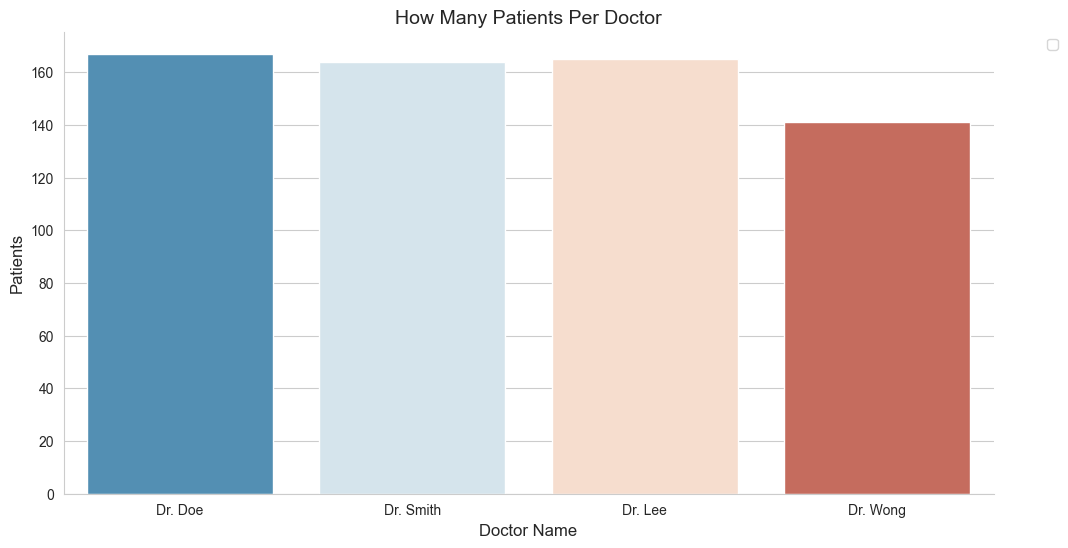

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the dimensions of the figure
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# Set titles and labels
ax.set_title("How Many Patients Per Doctor", fontsize=14)
ax.set_xlabel('Doctor Name', fontsize=12)
ax.set_ylabel('Patients', fontsize=12)

# Set Seaborn style and despine the plot
sns.set_style('whitegrid')
sns.despine()

# Create countplot with custom palette and dodge=False to avoid overlapping bars
sns.countplot(x='doctor_name', hue='doctor_name', palette='RdBu_r', data=df, dodge=False)

# Add a legend title for better understanding
ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with a more informative title
plt.show()

- `Dr. Doe` :167
- `Dr. Lee` :165
- `Dr. Smith`:164
- `Dr. Wong` :141


## 5.3 Class Cases For Each Doctor?

As mentioned on the earlier sections, we have a column name `class`, which basically contains the value of either `benign` and `malignant`. We wish to understand further whether a person's tumor is `malignant` (cancerous) or `benign` (not cancerous). With that being said, let's get down to business and try to visualize them further down below.


In [218]:
# Print the column names of the DataFrame to check for the correct column name
print(df.columns)

Index(['patient_id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'doctor_name'],
      dtype='object')


In [219]:
df.columns = df.columns.str.strip()
print(df.columns)

Index(['patient_id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'doctor_name'],
      dtype='object')


In [220]:
# class_by_doctor = df[("class")].value_counts()
# class_by_doctor

if 'class' in df.columns:
    class_by_doctor = df['class'].value_counts()
    print(class_by_doctor)
else:
    print("The 'class' column is not present in the DataFrame.")

class
benign       407
malignant    230
Name: count, dtype: int64


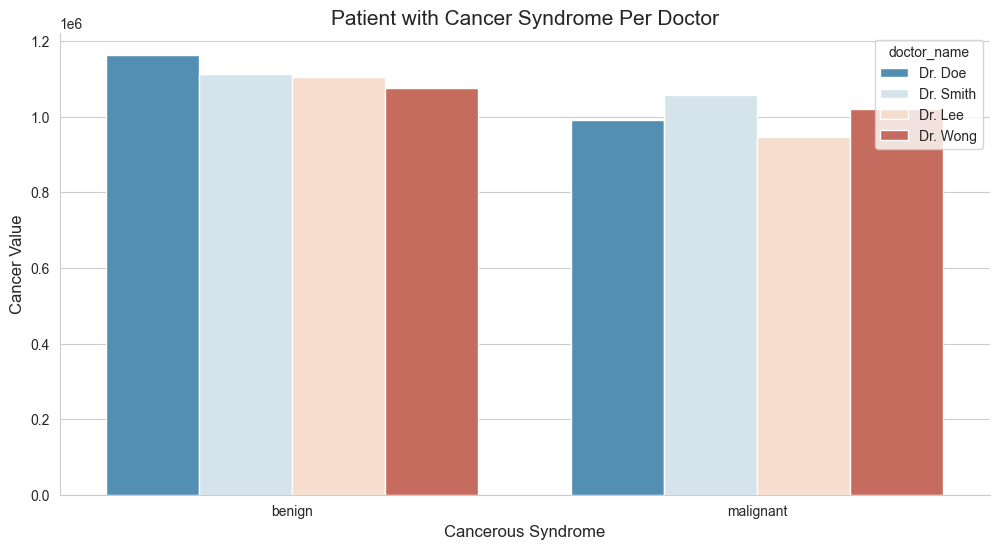

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# updated code
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

ax.set_title("Patient with Cancer Syndrome Per Doctor", fontsize=15)
ax.set_xlabel('Cancerous Syndrome', fontsize=12)
ax.set_ylabel('Cancer Value', fontsize=12)

sns.despine()
sns.set_style('whitegrid')
sns.barplot(x="class", y="patient_id", hue="doctor_name", errorbar=None, palette='RdBu_r', data=df)

plt.show()

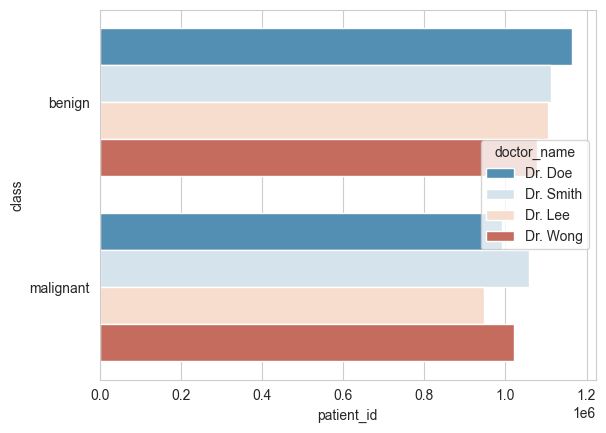

In [222]:
# This time, let's do them horizontally

# updated code
ax.set_title("Class of Patient Per Doctor", fontsize=15)
ax.set_xlabel('Doctor Name', fontsize=12)
ax.set_ylabel('Patients', fontsize=12)

sns.despine()
sns.set_style('whitegrid')
sns.barplot(x="patient_id", y="class", hue="doctor_name", errorbar=None, palette='RdBu_r', data=df)

plt.show()

## 5.4 Class Case Per Doctor?

As mentioned on the earlier sections, we have a column name `class`, which basically contains the value of `benign` and `malignant`. We wish to understand further whether a person's tumor is `malignant` (cancerous) or `benign` (not cancerous). With that being said, let's get down to business and try to visualize them further down below.


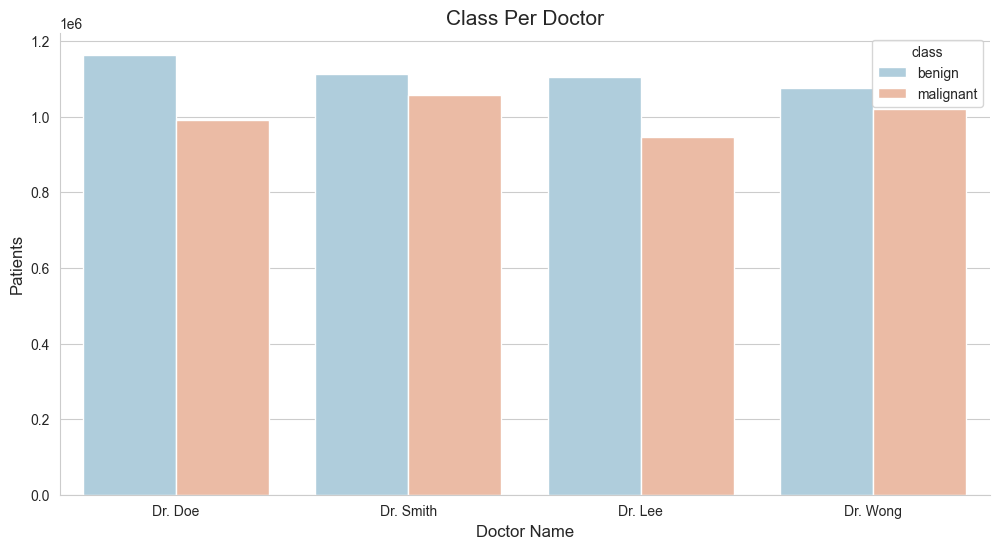

In [223]:
# udpated code
import matplotlib.pyplot as plt
import seaborn as sns

# Define the figure dimensions
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# Set plot title and labels
ax.set_title("Class Per Doctor", fontsize=15)
ax.set_xlabel('Doctor Name', fontsize=12)
ax.set_ylabel('Patients', fontsize=12)

# Set style and despine
sns.set_style('whitegrid')
sns.despine()

# Create the barplot with the updated parameter
sns.barplot(x='doctor_name', y='patient_id', hue='class', errorbar=None, palette='RdBu_r', data=df)

# Show the plot
plt.show()

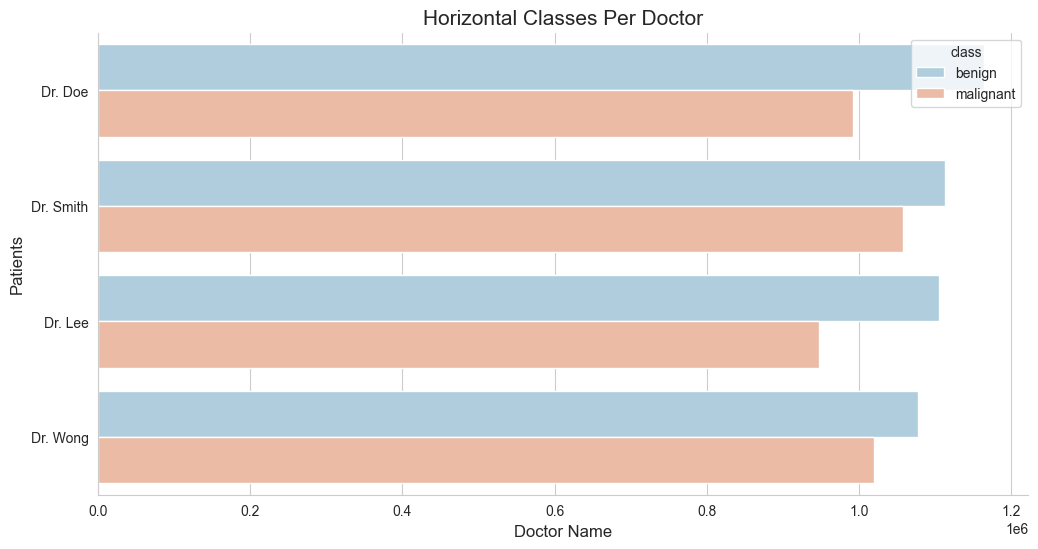

In [224]:
# updated code
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)

ax.set_title("Horizontal Classes Per Doctor", fontsize=15)
ax.set_xlabel('Doctor Name', fontsize=12)
ax.set_ylabel('Patients', fontsize=12)

sns.despine()
sns.set_style('whitegrid')
sns.barplot(y='doctor_name', x='patient_id', hue='class', errorbar=None, palette='RdBu_r', data=df)

plt.show()

In [225]:
df.isnull().values.any()
df.isnull().sum().sum()

0

---


# 6. One Hot Encoding

Now that we've gone through the previous topic of visualizing our dataset, let's continue to the next section of preparing them in a way that our machine learning algorithms, by which will be using them near the end of this article, would be able to pick them up and run them through our `predictive model` easily. You may ask, "Of all the previous process, they're not enough?". Well apparently, it's not sufficient enough to meet the standards.

As among one of the challenges that we're facing is still within the dataset itself. We'll be better off by modifying them to meet the requirements. Our dataset still consist some categorical values in them, the `doctors_name` and `class` columns are two of good examples. And Machine Learning algorithm don't normally like them. We need to modify these two columns, so that it would make it easier and less confusing for the machine learning model to process through. I came across this [great example](https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621) on how to deal with the similar situation.


## 6.1 `doctor_name` column.

Let's first try to deal with the `doctor_name` column. This particular consist of 4 distinct values in them and how Pandas would handle them would probably as an object rather than an integer. Let's have our work around for this particular area. Will create another variable and call it `doctors_hotEncoded` and use the `get_dummies` method to transform them to an encoded one.


In [226]:
doctors_hotEncoded = pd.get_dummies(df['doctor_name'])

In [227]:
doctors_hotEncoded

,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
0,True,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,True
...,...,...,...,...
693,False,True,False,False
694,False,True,False,False
695,False,False,True,False
696,False,True,False,False


In [228]:
combined_doctors_hotEncoded_df = pd.concat([df, doctors_hotEncoded], axis=1)

In [229]:
combined_doctors_hotEncoded_df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe,True,False,False,False
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith,False,False,True,False
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee,False,True,False,False
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith,False,False,True,False
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,Dr. Lee,False,True,False,False
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee,False,True,False,False
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith,False,False,True,False
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee,False,True,False,False


In [230]:
# Now let's drop the 'doctor_name' varibale
combined_doctors_hotEncoded_df = combined_doctors_hotEncoded_df.drop(columns=['doctor_name'])

In [231]:
# This is how it would look like.
combined_doctors_hotEncoded_df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,True,False,False,False
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,False,False,True,False
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,False,True,False,False
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,False,False,True,False
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,benign,False,True,False,False
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,False,True,False,False
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,False,False,True,False
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,False,True,False,False


In [232]:
combined_doctors_hotEncoded_df.isnull().values.any()
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

## 6.2 `class` column.


In [233]:
# How to convert benign & malingant to 0 and 1
change_class_numeric = {'benign':0, 'malignant':1}
combined_doctors_hotEncoded_df['class'] = combined_doctors_hotEncoded_df['class'].map(change_class_numeric)

In [234]:
combined_doctors_hotEncoded_df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,0,True,False,False,False
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,0,False,False,True,False
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,0,False,True,False,False
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,0,False,False,True,False
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,0,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,0,False,True,False,False
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,0,False,True,False,False
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,0,False,False,True,False
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,1,False,True,False,False


In [235]:
#Making a new column based on a nuemrical calcualtion of other columns in the df
combined_doctors_hotEncoded_df['new_column'] = df.normal_nucleoli * df.mitoses

In [236]:
combined_doctors_hotEncoded_df.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,0,True,False,False,False,1.0
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,0,False,False,True,False,2.0
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,0,False,True,False,False,1.0
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,0,False,False,True,False,7.0
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,0,False,False,False,True,1.0


In [237]:
combined_doctors_hotEncoded_df.isnull().values.any()
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

# 7. Feature Generation


This is among the crucial aspect area of `Machine Learning` model in the article, as this article [point out](https://towardsdatascience.com/data-wrangling-with-pandas-5b0be151df4e) an individual might be classified as having a cancer if meet the following condtion:

- Their `cell_size_uniformity` is greater than 5, and
- Their `cell_shape_uniformity` is greater than 5.

Based on this information, we could create another Feature from them.


In [238]:
# Feature building: 
def celltypelabel(x):
    if ((x['cell_size_uniformity'] > 5) & (x['cell_shape_uniformity'] > 5)):
        return('1')
    else:
        return('0')

The code provided defines a function `celltypelabel` that takes a dictionary `x` as input and returns a string value based on the values of two specific keys within that dictionary: `'cell_size_uniformity'` and `'cell_shape_uniformity'`.

Here’s a step-by-step explanation of the function:

1. **Function Definition**:

   ````python
   def celltypelabel(x):
       ```
   This defines a function named `celltypelabel` that takes one argument, `x`.

   ````

2. **Conditional Statement**:

   ````python
   if ((x['cell_size_uniformity'] > 5) & (x['cell_shape_uniformity'] > 5)):
       ```
   This is a conditional statement that checks two conditions:
   - The value of `'cell_size_uniformity'` in the dictionary `x` must be greater than 5.
   - The value of `'cell_shape_uniformity'` in the dictionary `x` must also be greater than 5.

   ````

3. **Logical AND Operator (`&`)**:
   The logical AND operator (`&`) is used to combine these two conditions. Both conditions must be true for this part of the if-statement to evaluate to True.

4. **Return Statement**:

   ```python
   return('1')
   ```

   If both conditions are met (i.e., both `'cell_size_uniformity'` and `'cell_shape_uniformity'` are greater than 5), the function returns the string `'1'`.

5. **Else Clause**:
   ```python
   else:
       return('0')
   ```
   If either or both conditions are not met (i.e., either `'cell_size_uniformity'` or `'cell_shape_uniformity'` is not greater than 5), the function returns the string `'0'`.


Then we use the pandas apply function to run the `celltypelabel(x)` function on the dataframe.


In [239]:
combined_doctors_hotEncoded_df['cell_type_label'] = combined_doctors_hotEncoded_df.apply(lambda x: celltypelabel(x), axis=1)

The code snippet provided is used to apply the `celltypelabel` function to each row of the `combined_doctors_hotEncoded_df` DataFrame. Here’s a breakdown of what this code does:

```python
combined_doctors_hotEncoded_df['cell_type_label'] = combined_doctors_hotEncoded_df.apply(lambda x: celltypelabel(x), axis=1)
```

### 7.1 Explanation:

1. **Apply Method**: The `.apply()` method is used to apply a function to each row or column of a DataFrame.
2. **Lambda Function**: A lambda function is used to define the function to be applied. In this case, it calls the `celltypelabel` function.
3. **Axis=1**: The `axis=1` parameter specifies that the function should be applied to each row (as opposed to each column, which would be `axis=0`).

### 7.2 Step-by-Step Breakdown:

1. **Define the Lambda Function**:

   ```python
   lambda x: celltypelabel(x)
   ```

   This defines a lambda function that takes a dictionary `x` and calls the `celltypelabel` function.

2. **Apply the Lambda Function to Each Row**:

   ```python
   combined_doctors_hotEncoded_df.apply(lambda x: celltypelabel(x), axis=1)
   ```

   This applies the lambda function to each row of the DataFrame. The result of this application is a new Series where each element is the output of the `celltypelabel` function for that corresponding row.

3. **Assign Result to New Column**:
   ```python
   combined_doctors_hotEncoded_df['cell_type_label'] = ...
   ```
   The result of applying the lambda function is assigned to a new column named `'cell_type_label'` in the DataFrame.


In [240]:
combined_doctors_hotEncoded_df[['patient_id', 'cell_type_label']]

,patient_id,cell_type_label
0,1000025,0
1,1002945,0
2,1015425,0
3,1016277,1
4,1017023,0
...,...,...
693,763235,0
694,776715,0
695,841769,0
696,888820,1


In [241]:
combined_doctors_hotEncoded_df

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column,cell_type_label
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,0,True,False,False,False,1.0,0
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,0,False,False,True,False,2.0,0
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,0,False,True,False,False,1.0,0
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,0,False,False,True,False,7.0,1
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,0,False,False,False,True,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,763235,3.0,1.0,1,1,2,1,2.0,1.0,2,0,False,True,False,False,2.0,0
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,0,False,True,False,False,1.0,0
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,0,False,False,True,False,1.0,0
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,1,False,True,False,False,20.0,1


In [242]:
combined_doctors_hotEncoded_df.isnull().values.any()
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

In [243]:
combined_doctors_hotEncoded_df.describe()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses,class,new_column
count,6.370000e+02,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,1.076689e+06,4.488226,3.210361,3.298273,2.897959,3.284144,3.516484,2.971743,1.629513,0.361068,7.197802
std,6.408652e+05,2.855856,3.080628,3.007153,2.924191,2.243639,2.470924,3.146200,1.783293,0.480688,16.037352
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,8.779430e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
50%,1.173235e+06,4.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,1.238464e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000,6.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,100.000000


In [244]:
combined_doctors_hotEncoded_df.isnull().values.any()
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

In [245]:
pd.crosstab(combined_doctors_hotEncoded_df['class'], combined_doctors_hotEncoded_df['cell_type_label'])

cell_type_label,0,1
class,,
0,404,3
1,118,112


# 8. Correlating Features


Heatmap of Correlation between different features:

> `Positive` = Positive correlation, i.e. increase in one feature will increase the other feature & vice-versa.<br > > `Negative` = Negative correlation, i.e. increase in one feature will decrease the other feature & vice-versa.

In our case, we focus on which features have strong positive or negative correlation with the _Survived_ feature.


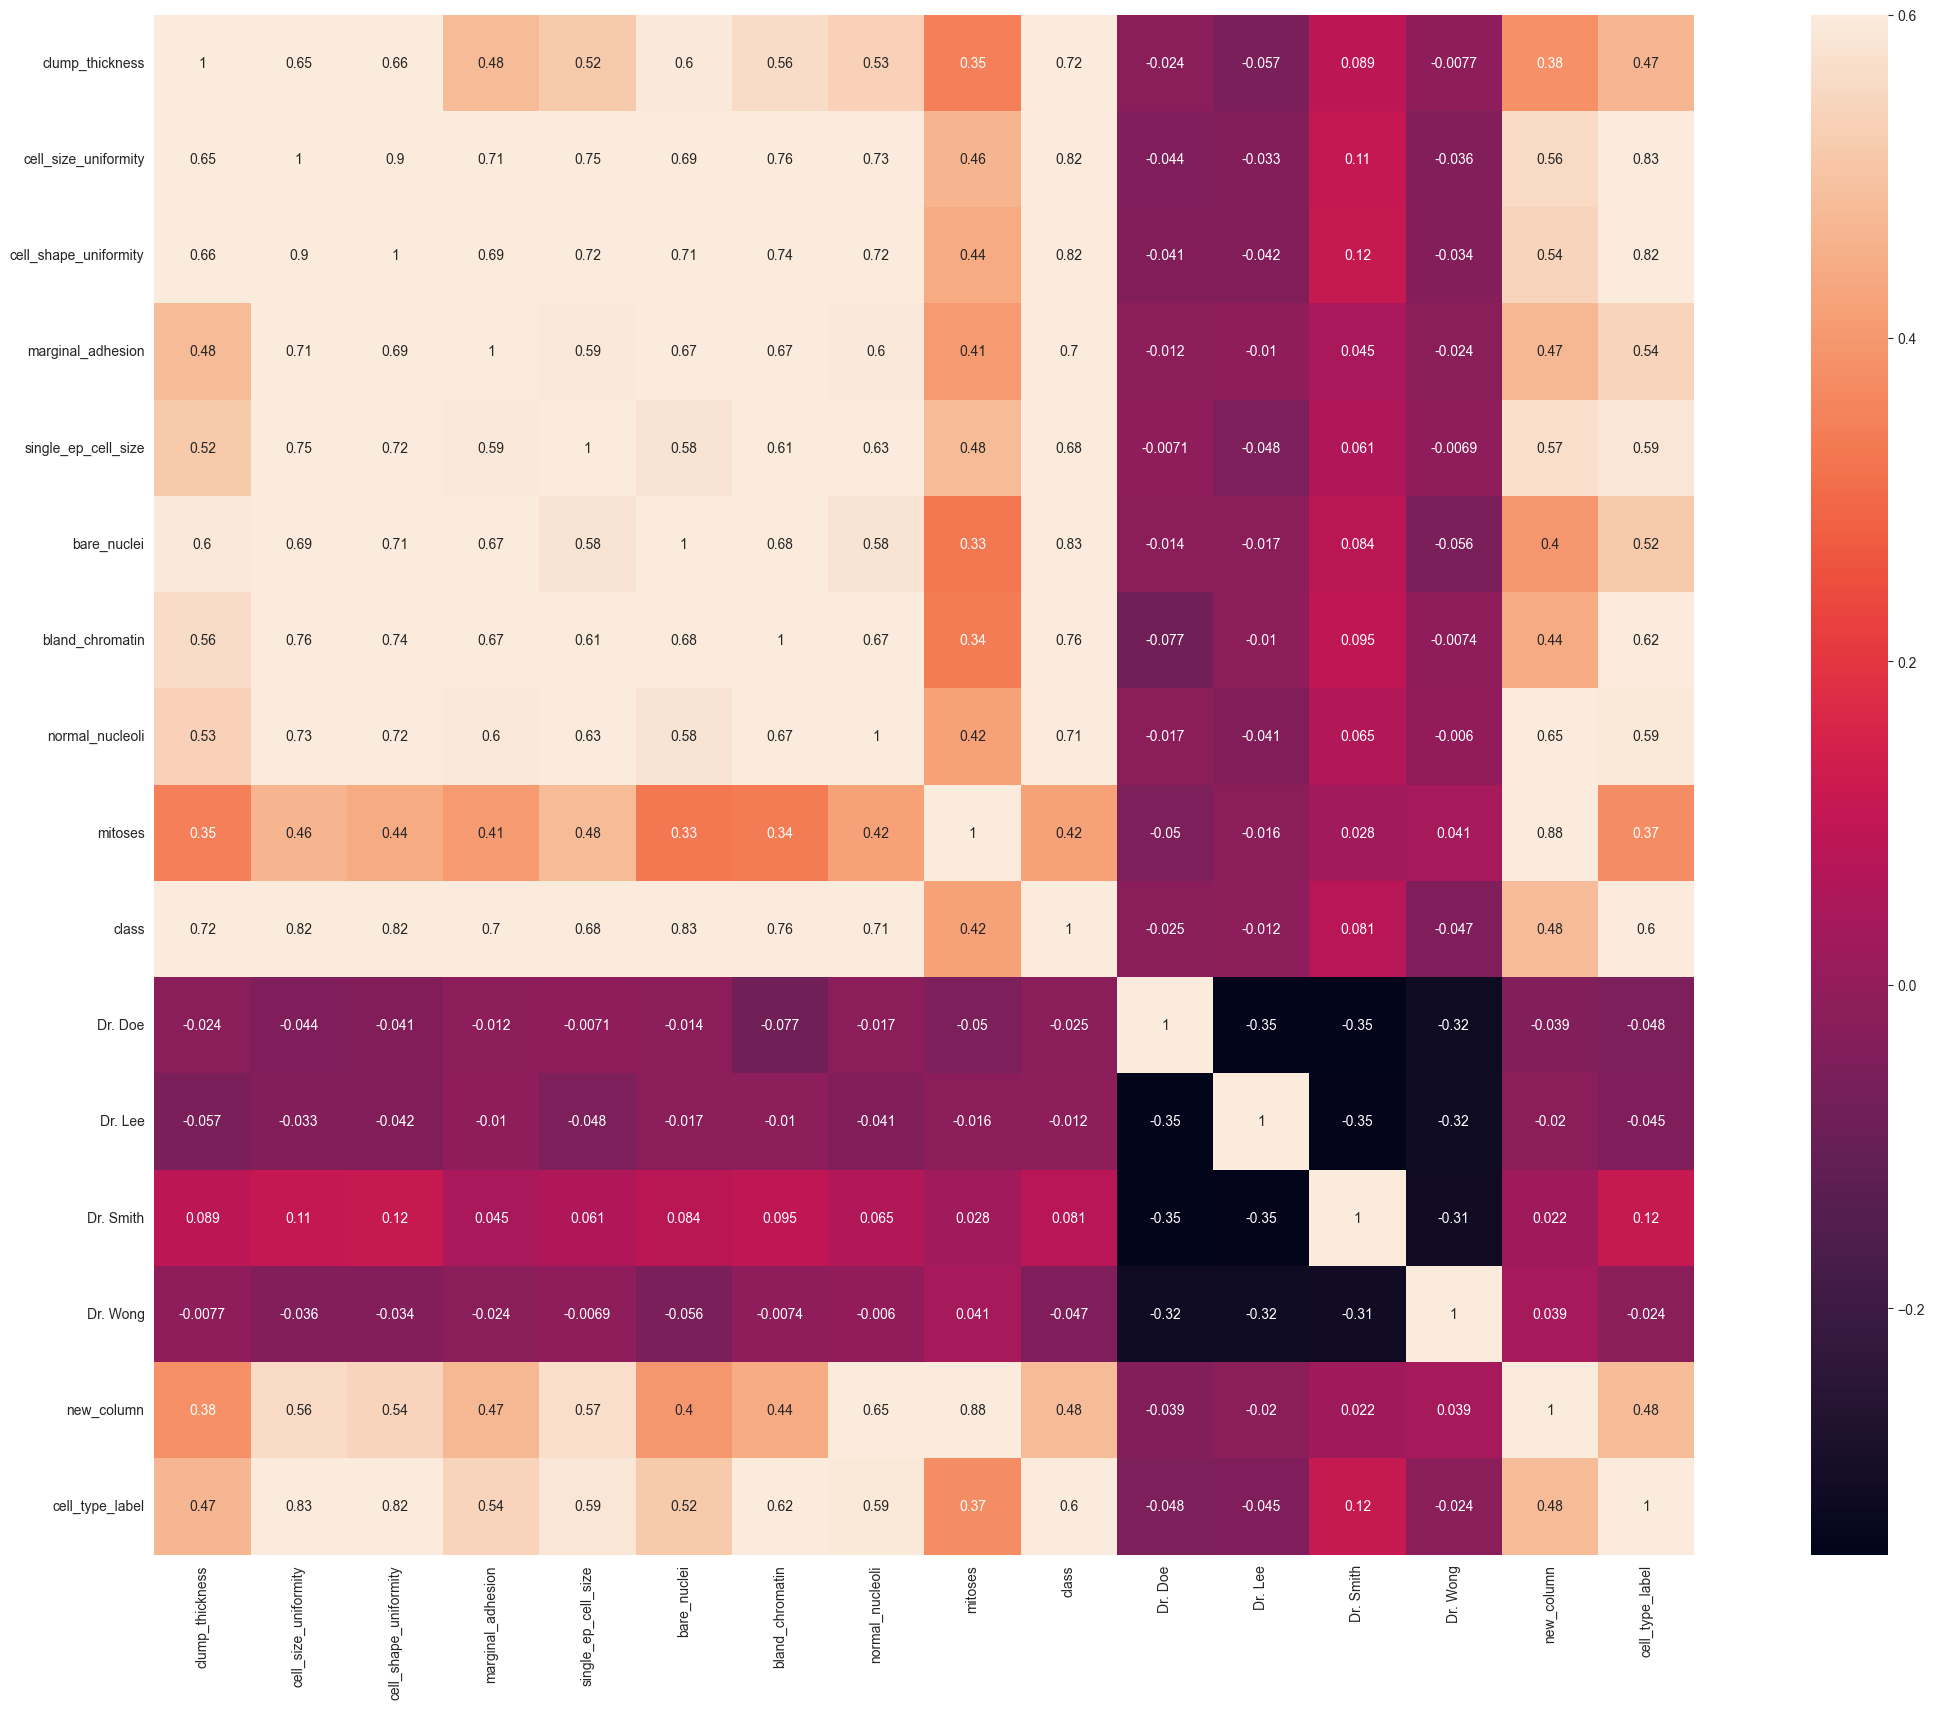

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Handle non-numeric values: Replace '?' with NaN and convert columns to numeric
combined_doctors_hotEncoded_df.replace('?', np.nan, inplace=True)
combined_doctors_hotEncoded_df = combined_doctors_hotEncoded_df.apply(pd.to_numeric, errors='coerce')

# Drop 'patient_id' column and compute the correlation matrix
corr_matrix = combined_doctors_hotEncoded_df.drop('patient_id', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(30, 20))
plt.xlabel("Values on X axis")
plt.ylabel('Values on Y axis')
sns.heatmap(corr_matrix, 
            xticklabels=True,
            vmax=0.6, 
            square=True, 
            annot=True)
plt.show()

# 9. Updating Data Types


In [247]:
combined_doctors_hotEncoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, 0 to 697
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             637 non-null    int64  
 1   clump_thickness        637 non-null    float64
 2   cell_size_uniformity   637 non-null    float64
 3   cell_shape_uniformity  637 non-null    int64  
 4   marginal_adhesion      637 non-null    int64  
 5   single_ep_cell_size    637 non-null    int64  
 6   bare_nuclei            621 non-null    float64
 7   bland_chromatin        637 non-null    float64
 8   normal_nucleoli        637 non-null    float64
 9   mitoses                637 non-null    int64  
 10  class                  637 non-null    int64  
 11  Dr. Doe                637 non-null    bool   
 12  Dr. Lee                637 non-null    bool   
 13  Dr. Smith              637 non-null    bool   
 14  Dr. Wong               637 non-null    bool   
 15  new_column 

In [248]:
# Let's try to change the datatypes of the following column in the dataset.
combined_doctors_hotEncoded_df['cell_type_label'] = combined_doctors_hotEncoded_df['cell_type_label'].astype('float64')

In [249]:
# Let's try to change the datatypes of the following column in the dataset.
combined_doctors_hotEncoded_df['bare_nuclei'] = pd.to_numeric(combined_doctors_hotEncoded_df.bare_nuclei, errors='coerce')

In [250]:
combined_doctors_hotEncoded_df.isnull().values.any()

True

In [251]:
combined_doctors_hotEncoded_df.isnull().sum().sum()

16

In [252]:
np.all(np.isfinite(combined_doctors_hotEncoded_df))

False

In [253]:
combined_doctors_hotEncoded_df.isnull().sum().sum()

16

In [254]:
# The bare_nuclei still has NaN or empty values in them?
combined_doctors_hotEncoded_df['bare_nuclei'].describe()

count    621.000000
mean       3.631240
std        3.675234
min        1.000000
25%        1.000000
50%        1.000000
75%        7.000000
max       10.000000
Name: bare_nuclei, dtype: float64

In [255]:
# delete the empy rows
combined_doctors_hotEncoded_df.dropna(axis=0, how='any', inplace=True)

In [256]:
np.any(np.isnan(combined_doctors_hotEncoded_df))

False

In [257]:
combined_doctors_hotEncoded_df.isnull().sum().sum()

0

In [258]:
np.all(np.isfinite(combined_doctors_hotEncoded_df))

True

In [259]:
combined_doctors_hotEncoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621 entries, 0 to 697
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             621 non-null    int64  
 1   clump_thickness        621 non-null    float64
 2   cell_size_uniformity   621 non-null    float64
 3   cell_shape_uniformity  621 non-null    int64  
 4   marginal_adhesion      621 non-null    int64  
 5   single_ep_cell_size    621 non-null    int64  
 6   bare_nuclei            621 non-null    float64
 7   bland_chromatin        621 non-null    float64
 8   normal_nucleoli        621 non-null    float64
 9   mitoses                621 non-null    int64  
 10  class                  621 non-null    int64  
 11  Dr. Doe                621 non-null    bool   
 12  Dr. Lee                621 non-null    bool   
 13  Dr. Smith              621 non-null    bool   
 14  Dr. Wong               621 non-null    bool   
 15  new_column 

In [260]:
combined_doctors_hotEncoded_df.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column,cell_type_label
0,1000025,5.0,1.0,1,1,2,1.0,3.0,1.0,1,0,True,False,False,False,1.0,0.0
1,1002945,5.0,4.0,4,5,7,10.0,3.0,2.0,1,0,False,False,True,False,2.0,0.0
2,1015425,3.0,1.0,1,1,2,2.0,3.0,1.0,1,0,False,True,False,False,1.0,0.0
3,1016277,6.0,8.0,8,1,3,4.0,3.0,7.0,1,0,False,False,True,False,7.0,1.0
4,1017023,4.0,1.0,1,3,2,1.0,3.0,1.0,1,0,False,False,False,True,1.0,0.0


# 10. Spliting Dataset


In [261]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming combined_doctors_hotEncoded_df is your DataFrame
train, test = train_test_split(combined_doctors_hotEncoded_df, test_size=0.2)

# No need to convert to DataFrame as train_test_split returns DataFrames if the input is a DataFrame
train = pd.DataFrame(train)
test = pd.DataFrame(test)

# Displaying first few rows of train and test DataFrames to verify
print("Train DataFrame:")
print(train.head())

print("\nTest DataFrame:")
print(test.head())


Train DataFrame:
     patient_id  clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
686      536708              1.0                   1.0                      1   
681     1371026              5.0                  10.0                     10   
309      673637              3.0                   1.0                      1   
229     1230175             10.0                  10.0                     10   
524      749653              3.0                   1.0                      1   

     marginal_adhesion  single_ep_cell_size  bare_nuclei  bland_chromatin  \
686                  1                    2          1.0              1.0   
681                 10                    4         10.0              5.0   
309                  1                    2          5.0              5.0   
229                  3                   10         10.0              9.0   
524                  1                    2          1.0              2.0   

     normal_nucleoli  mitoses  cl

In [262]:
# Now that we've managed to split our main combined dataset into train and test dataset, let's test them.
train.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column,cell_type_label
686,536708,1.0,1.0,1,1,2,1.0,1.0,1.0,1,0,True,False,False,False,1.0,0.0
681,1371026,5.0,10.0,10,10,4,10.0,5.0,6.0,3,1,False,False,False,True,18.0,1.0
309,673637,3.0,1.0,1,1,2,5.0,5.0,1.0,1,0,False,False,True,False,1.0,0.0
229,1230175,10.0,10.0,10,3,10,10.0,9.0,10.0,1,1,True,False,False,False,10.0,1.0
524,749653,3.0,1.0,1,1,2,1.0,2.0,1.0,1,0,False,False,True,False,1.0,0.0


In [263]:
test.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column,cell_type_label
440,608157,10.0,4.0,3,10,4,10.0,10.0,1.0,1,1,False,False,True,False,1.0,0.0
590,1294261,4.0,10.0,8,5,4,1.0,10.0,1.0,1,1,False,True,False,False,1.0,1.0
234,1236043,3.0,3.0,2,1,3,1.0,3.0,6.0,1,0,True,False,False,False,6.0,0.0
143,1184184,1.0,1.0,1,1,2,5.0,1.0,1.0,1,0,False,False,True,False,1.0,0.0
560,1321942,5.0,1.0,1,1,2,1.0,3.0,1.0,1,0,True,False,False,False,1.0,0.0


In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 686 to 471
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             496 non-null    int64  
 1   clump_thickness        496 non-null    float64
 2   cell_size_uniformity   496 non-null    float64
 3   cell_shape_uniformity  496 non-null    int64  
 4   marginal_adhesion      496 non-null    int64  
 5   single_ep_cell_size    496 non-null    int64  
 6   bare_nuclei            496 non-null    float64
 7   bland_chromatin        496 non-null    float64
 8   normal_nucleoli        496 non-null    float64
 9   mitoses                496 non-null    int64  
 10  class                  496 non-null    int64  
 11  Dr. Doe                496 non-null    bool   
 12  Dr. Lee                496 non-null    bool   
 13  Dr. Smith              496 non-null    bool   
 14  Dr. Wong               496 non-null    bool   
 15  new_colum

In [265]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 440 to 324
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             125 non-null    int64  
 1   clump_thickness        125 non-null    float64
 2   cell_size_uniformity   125 non-null    float64
 3   cell_shape_uniformity  125 non-null    int64  
 4   marginal_adhesion      125 non-null    int64  
 5   single_ep_cell_size    125 non-null    int64  
 6   bare_nuclei            125 non-null    float64
 7   bland_chromatin        125 non-null    float64
 8   normal_nucleoli        125 non-null    float64
 9   mitoses                125 non-null    int64  
 10  class                  125 non-null    int64  
 11  Dr. Doe                125 non-null    bool   
 12  Dr. Lee                125 non-null    bool   
 13  Dr. Smith              125 non-null    bool   
 14  Dr. Wong               125 non-null    bool   
 15  new_colum

# 11. Machine Learning


## 11.1 Feature Selection

We drop unnecessary columns/features and keep only the useful ones for our experiment. Column _patient_id_ is only dropped from Train set because we need _patient_id_ in Test set while for running the experimentation.


In [266]:
train = train.drop(['patient_id', 'new_column'], axis=1)
test = test.drop('cell_type_label', axis=1)

## 11.2 Classification & Accuracy

Define training and testing set


In [267]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [268]:
train.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,cell_type_label
686,1.0,1.0,1,1,2,1.0,1.0,1.0,1,0,True,False,False,False,0.0
681,5.0,10.0,10,10,4,10.0,5.0,6.0,3,1,False,False,False,True,1.0
309,3.0,1.0,1,1,2,5.0,5.0,1.0,1,0,False,False,True,False,0.0
229,10.0,10.0,10,3,10,10.0,9.0,10.0,1,1,True,False,False,False,1.0
524,3.0,1.0,1,1,2,1.0,2.0,1.0,1,0,False,False,True,False,0.0


In [269]:
test.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong,new_column
440,608157,10.0,4.0,3,10,4,10.0,10.0,1.0,1,1,False,False,True,False,1.0
590,1294261,4.0,10.0,8,5,4,1.0,10.0,1.0,1,1,False,True,False,False,1.0
234,1236043,3.0,3.0,2,1,3,1.0,3.0,6.0,1,0,True,False,False,False,6.0
143,1184184,1.0,1.0,1,1,2,5.0,1.0,1.0,1,0,False,False,True,False,1.0
560,1321942,5.0,1.0,1,1,2,1.0,3.0,1.0,1,0,True,False,False,False,1.0


In [270]:
X_train = train.drop('cell_type_label', axis=1)
y_train = train['cell_type_label']
X_test = test.drop(["patient_id", "new_column"], axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((496, 14), (496,), (125, 14))

In [271]:
X_train.to_csv('train.csv', encoding='utf-8', index = False)
X_test.to_csv('test.csv', encoding='utf-8', index = False)

In [272]:
X_train

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
686,1.0,1.0,1,1,2,1.0,1.0,1.0,1,0,True,False,False,False
681,5.0,10.0,10,10,4,10.0,5.0,6.0,3,1,False,False,False,True
309,3.0,1.0,1,1,2,5.0,5.0,1.0,1,0,False,False,True,False
229,10.0,10.0,10,3,10,10.0,9.0,10.0,1,1,True,False,False,False
524,3.0,1.0,1,1,2,1.0,2.0,1.0,1,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,1.0,1.0,1,1,2,1.0,3.0,1.0,1,0,True,False,False,False
432,5.0,1.0,1,1,2,1.0,2.0,2.0,1,0,False,False,True,False
679,2.0,1.0,1,1,2,1.0,1.0,1.0,1,0,True,False,False,False
300,8.0,4.0,10,5,4,4.0,7.0,10.0,1,1,False,False,True,False


In [273]:
y_train

686    0.0
681    1.0
309    0.0
229    1.0
524    0.0
      ... 
269    0.0
432    0.0
679    0.0
300    0.0
471    0.0
Name: cell_type_label, Length: 496, dtype: float64

In [274]:
X_test

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,Dr. Doe,Dr. Lee,Dr. Smith,Dr. Wong
440,10.0,4.0,3,10,4,10.0,10.0,1.0,1,1,False,False,True,False
590,4.0,10.0,8,5,4,1.0,10.0,1.0,1,1,False,True,False,False
234,3.0,3.0,2,1,3,1.0,3.0,6.0,1,0,True,False,False,False
143,1.0,1.0,1,1,2,5.0,1.0,1.0,1,0,False,False,True,False
560,5.0,1.0,1,1,2,1.0,3.0,1.0,1,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,1.0,1.0,1,1,2,1.0,2.0,1.0,1,0,False,False,False,True
71,6.0,10.0,2,8,10,2.0,7.0,8.0,10,1,False,False,True,False
18,10.0,7.0,7,6,4,10.0,4.0,1.0,2,1,False,False,True,False
251,10.0,4.0,4,10,2,10.0,5.0,3.0,3,1,True,False,False,False


## 11.3 Logistic Regression

[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression), or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.


In [275]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
clf = LogisticRegression(max_iter=1000, solver='lbfgs')
clf.fit(X_train_scaled, y_train)

# Predict and calculate accuracy
y_pred_log_reg = clf.predict(X_test_scaled)
acc_log_reg = round(accuracy_score(y_train, clf.predict(X_train_scaled)) * 100, 2)
print(str(acc_log_reg) + '%')


97.18%


## 11.4 Support Vector Machine (SVM)

[Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine) model is a Supervised Learning model used for classification and regression analysis. It is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. In the case of support vector machines, a data point is viewed as a $p$-dimensional vector (a list of $p$ numbers), and we want to know whether we can separate such points with a $(p-1)$-dimensional hyperplane.

When data are not labeled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The clustering algorithm which provides an improvement to the support vector machines is called **support vector clustering** and is often used in industrial applications either when data are not labeled or when only some data are labeled as a preprocessing for a classification pass.

In the below code, [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) stands for Support Vector Classification.


In [276]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

97.98


## 11.5 Linear SVM

Linear SVM is a SVM model with linear kernel.

In the below code, [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) stands for Linear Support Vector Classification.


In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear SVC model
clf = LinearSVC(dual='auto', max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Predict and calculate accuracy
y_pred_linear_svc = clf.predict(X_test_scaled)
acc_linear_svc = round(accuracy_score(y_train, clf.predict(X_train_scaled)) * 100, 2)
print(acc_linear_svc)


97.18


## 11.6 $k$-Nearest Neighbors

[$k$-nearest neighbors algorithm (k-NN)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is one of the simplest machine learning algorithms and is used for classification and regression. In both cases, the input consists of the $k$ closest training examples in the feature space. The output depends on whether $k$-NN is used for classification or regression:

- In _$k$-NN classification_, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.

- In _$k$-NN regression_, the output is the property value for the object. This value is the average of the values of its $k$ nearest neighbors.


In [278]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

97.78


## 11.7 Decision Tree

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.


In [279]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

100.0


### 11.7.1 Random Forest

[Random forests](https://en.wikipedia.org/wiki/Random_forest) or **random decision forests** are an **ensemble learning method** for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for _decision trees' habit of overfitting to their training set_.

[Ensemble methods](https://en.wikipedia.org/wiki/Ensemble_learning) use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.


In [280]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

100.0


## 11.8 Gaussian Naive Bayes

[Naive Bayes classifiers](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.[Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) (alternatively **Bayes' law** or **Bayes' rule**) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.


In [281]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

91.33


## 11.9 Perceptron

[Perceptron](https://en.wikipedia.org/wiki/Perceptron) is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.


In [282]:
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print (acc_perceptron)

92.74


## 11.10 Stochastic Gradient Descent (SGD)

[Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (often shortened in **SGD**), also known as incremental gradient descent, is a stochastic approximation of the gradient descent optimization method for minimizing an objective function that is written as a sum of differentiable functions. In other words, SGD tries to find minima or maxima by iteration.


In [283]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)
print (acc_sgd)

94.76


## 11.11 Confusion Matrix

A [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabelling one as another).

In predictive analytics, a table of confusion (sometimes also called a confusion matrix), is a table with two rows and two columns that reports the number of false positives, false negatives, true positives, and true negatives. This allows more detailed analysis than mere proportion of correct classifications (accuracy). Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly). For example, if there were 95 cats and only 5 dogs in the data set, a particular classifier might classify all the observations as cats. The overall accuracy would be 95%, but in more detail the classifier would have a 100% recognition rate for the cat class but a 0% recognition rate for the dog class.

Here's another guide explaining [Confusion Matrix with example](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/).

$\begin{matrix} & Predicted Positive & Predicted Negative \\ Actual Positive & TP & FN \\ Actual Negative & FP & TN \end{matrix}$

In our (Titanic problem) case:

**True Positive:** The classifier predicted _Survived_ **and** the passenger actually _Survived_.<br /> > **True Negative:** The classifier predicted _Not Survived_ **and** the passenger actually _Not Survived_.<br /> > **False Postiive:** The classifier predicted _Survived_ **but** the passenger actually _Not Survived_.<br /> > **False Negative:** The classifier predicted _Not Survived_ **but** the passenger actually _Survived_.


In the example code below, we plot a confusion matrix for the prediction of **_Random Forest Classifier_** on our training dataset. This shows how many entries are correctly and incorrectly predicted by our classifer.


Accuracy: 100 % 

Confusion Matrix in Numbers
[[407   0]
 [  0  89]]

Confusion Matrix in Percentage
[[1. 0.]
 [0. 1.]]



<Axes: >

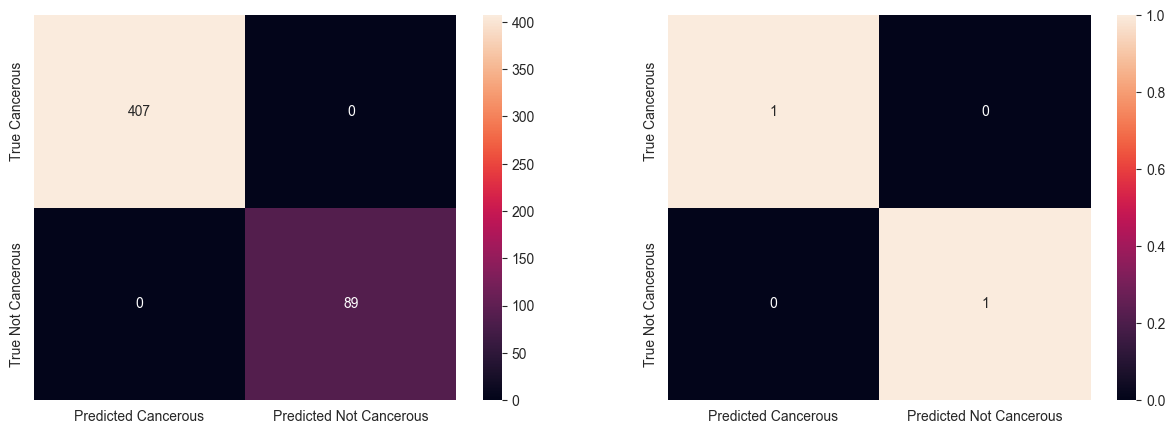

In [284]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Cancerous', 'Not Cancerous']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Cancerous', 'True Not Cancerous']
predicted_class_names = ['Predicted Cancerous', 'Predicted Not Cancerous']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

# 12. Comparing Models

Let's compare the accuracy score of all the classifier models used above.


In [285]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,100.00
5,Random Forest,100.00
1,Support Vector Machines,97.98
3,KNN,97.78
0,Logistic Regression,97.18
2,Linear SVC,97.18
8,Stochastic Gradient Decent,94.76
7,Perceptron,92.74
6,Naive Bayes,91.33


From the above table, we can see that _Decision Tree_ and _Random Forest_ classfiers have the highest accuracy score. Among these two, we choose _Random Forest_ classifier as it has the ability to limit overfitting as compared to _Decision Tree_ classifier.


# 13.Create Prediction


In [286]:
submission = pd.DataFrame({
        "patient_id": test["patient_id"],
        "cell_type_label": y_pred_random_forest
    })

submission.to_csv('submission.csv', index=False)